# Welcome to PyCO2SYS!

***If you're totally new to PyCO2SYS, this is the right place to be!***

If you're also new to Python, you should still be able to follow what's going on here and understand how to make some changes to the code - but this is not intended as a Python tutorial.

We will work through a series of examples of PyCO2SYS calculations, starting with the most basic and gradually building up the complexity.

> **How does this work?**
> 
> This is a [Jupyter notebook](https://realpython.com/jupyter-notebook-introduction/).  If you're viewing this [through Binder](https://mybinder.org/v2/gh/mvdh7/PyCO2SYS-examples/master), then Python is running live in your web browser!
>
> You can run the different sections of code below by clicking on them with your mouse.  The selected code section gets outlined by a box with a thick green or blue bar down the left-hand side.  Then either click the Run button at the top or press ctrl+enter on your keyboard to run the selected section.
>
> To the upper left of each code section you will see `In [ ]:`.  An asterisk (`*`) appears between the brackets while the code is running, which changes to a number once each section of code has successfully run.  Once it has been run (but not before!), the results calculated in one code section can be used in any other.  **Some sections do rely on earlier ones having been run, so make sure you run them all in sequence!**
>
> You can edit the code freely and run it again to see what happens.  Don't worry, your changes are only local, so they won't affect anyone else.  If you close the notebook and start it up again it will all be reset (unless you've downloaded this and are running it on your own Jupyter server).

## Import CO2SYS

Before we can use any package like PyCO2SYS in Python we must import it.  This is very simple to do.  For this example, we don't need to import the entire of PyCO2SYS, but just the main CO2SYS function from it.  The first line of code below does this.  Not much appears to happen, but check that a number appears in the brackets at the top left (e.g. `In [1]:`):

In [1]:
from PyCO2SYS import CO2SYS

## Solve the marine carbonate system!

Now that we've imported CO2SYS, we can define some seawater conditions and solve the marine carbonate system from them.

Imagine we measured the pH and dissolved inorganic carbon (DIC) of a seawater sample in the lab at 25 °C.  The sample was collected from a seawater pressure of 5 dbar (roughly 5 m depth - pressure excludes atmospheric pressure) and it had a temperature of 10 °C there.  We want to know what the saturation state of aragonite was *in situ* when and where the sample was collected.

The lab environment sets the "input conditions" for CO2SYS inputs and outputs (i.e. temperature = 25 °C, pressure = 0), while the in situ environment sets the "output conditions" (i.e. temperature = 10 °C, pressure = 100 dbar).

> For more information on the inputs and ouputs below please consult the [online docs](https://pyco2sys.readthedocs.io/en/latest/co2sys/).
>
> You can also find the [full citations](https://pyco2sys.readthedocs.io/en/latest/refs/) for the abbreviated references (e.g. `LDK00`) mentioned in the code.

In [2]:
# Everything on a line after a # symbol is just a comment!

# Define the known marine carbonate system parameters
PAR1 = 8.05  # pH measured in the lab, Total scale
PAR2 = 2050  # DIC measured in the lab in μmol/kg-sw
PAR1TYPE = 3  # tell CO2SYS: "PAR1 is a pH value"
PAR2TYPE = 2  # tell CO2SYS: "PAR2 is a DIC value"
pHSCALEIN = 1  # tell CO2SYS: "the pH input is on the Total scale"

# Define the seawater conditions
SAL = 35  # practical salinity
TEMPIN  = 25  # lab temperature (input conditions) in °C
TEMPOUT = 10  # in-situ temperature (output conditions) in °C
PRESIN  = 0  # lab pressure (input conditions) in dbar, ignoring the atmosphere
PRESOUT = 5  # in-situ pressure (output conditions) in dbar, ignoring the atmosphere
SI  = 8.2  # total silicate in μmol/kg-sw
PO4 = 0.3  # total phosphate in μmol/kg-sw
NH3 = 0.1  # total ammonia in μmol/kg-sw
H2S = 0.2  # total sulfide in μmol/kg-sw

# Define CO2SYS settings
K1K2CONSTANTS = 10  # tell CO2SYS: "use carbonate equilibrium constants of LDK00"
KSO4CONSTANTS = 3  # tell CO2SYS: "use bisulfate dissociation constant of D90a and borate:salinity of LKB10"

# Now calculate everything with CO2SYS!
CO2dict = CO2SYS(PAR1, PAR2, PAR1TYPE, PAR2TYPE, SAL, TEMPIN, TEMPOUT, PRESIN, PRESOUT, SI, PO4,
                 pHSCALEIN, K1K2CONSTANTS, KSO4CONSTANTS, NH3=NH3, H2S=H2S)

# `CO2dict` contains all the different calculated seawater properties as a dict.
# Aragonite saturation state under the output conditions has the key `"OmegaARout"`.
# Here we extract that result only and store it as `result`:
result = CO2dict["OmegaARout"]

# Now, tell us the answer!
print("The calculated result is:")
print(result)

The calculated result is:
[3.23625847]


If all went well then you should see the aragonite saturation state (about 3.2 for the example values used) printed out directly above here.

### Try changing the inputs

You can edit the code above and then re-run it to see the effect on the result.  Some things you might try:

  1.  Change the **seawater conditions** (any of `PAR1`, `PAR2`, `SAL`, `TEMPIN`, `TEMPOUT`, `PRESIN`, `PRESOUT`, `SI`, `PHOS`, `NH3` or `H2S`).
  
  2.  Change the **equilibrium constants** used for the calculations (`K1K2CONSTANTS` and `KSO4CONSTANTS`; see the [settings docs](https://pyco2sys.readthedocs.io/en/latest/co2sys/#settings) for your options).
  
  3.  Change the **pH scale** that the input pH is declared as being on (`pHSCALEIN`; see the [settings docs](https://pyco2sys.readthedocs.io/en/latest/co2sys/#settings)).
  
  4.  Change the input pair of **marine carbonate system parameters** (`PAR1` and `PAR1TYPE` and/or `PAR2` and `PAR2TYPE`; see the [input parameters docs](https://pyco2sys.readthedocs.io/en/latest/co2sys/#carbonate-system-parameters)).
  
  5.  Change the **output variable** that is printed out (change `"OmegaARout"` to something different; see the [output docs](https://pyco2sys.readthedocs.io/en/latest/co2sys/#outputs)).

## Calculations with arrays

PyCO2SYS doesn't have to process one calculation at a time - it is optimised to run calculations over many different solution compositions at the same time.

> In the example here, only one of the inputs is an array, while the others are all single values.
>
> But every single input variable given to PyCO2SYS can be provided either as an array, or as a single value, in any combination - including those controlling the [settings](https://pyco2sys.readthedocs.io/en/latest/co2sys/#settings).
>
> Arrays must be [NumPy ndarrays](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html?highlight=ndarray#numpy.ndarray) (unless you're using the [Pythonic API](https://pyco2sys.readthedocs.io/en/latest/co2sys/#using-the-pythonic-api) for Pandas/Xarray-style inputs) but they can have as many dimensions as you like - although the output will be `ravel`ed to one dimension.  The only (obvious) restriction is that all non-scalar inputs must contain the same number of elements as each other.

### Effect of increasing <i>p</i>CO<sub>2</sub>

Let's continue from the example above and see how increasing seawater <i>p</i>CO<sub>2</sub> alone would change the saturation state of aragonite for that sample, assuming that total alkalinity remains constant.

#### Get starting conditions

We'll use the same seawater conditions and CO2SYS settings as we defined previously, so we don't need to write those out again.  But we will redefine the marine carbonate system, starting from the total alkalinity and seawater <i>p</i>CO<sub>2</sub> that we calculated above as part of `CO2dict`.

In [3]:
# Get total alkalinity and initial seawater pCO2
TAlk = CO2dict["TAlk"]
pCO2_now = CO2dict["pCO2out"]

# See what they are!
print("Total alkalinity is: {:.1f} μmol/kg-sw".format(TAlk[0]))
print("Initial seawater pCO2 is: {:.1f} μatm".format(pCO2_now[0]))

Total alkalinity is: 2362.4 μmol/kg-sw
Initial seawater pCO2 is: 215.1 μatm


#### Generate array of increasing <i>p</i>CO<sub>2</sub> values

We can use a tool from the Python package [NumPy](https://numpy.org/doc/stable/) to conveniently generate an array of increasing seawater <i>p</i>CO<sub>2</sub> values:

In [4]:
import numpy as np  # now we have access to NumPy's tools

pCO2_end = 1000  # maximum pCO2 value to go to in μatm
n_steps = 20  # number of regularly-spaced values to make from `pCO2_now` to `pCO2_end`
pCO2_increasing = np.linspace(pCO2_now, pCO2_end, n_steps)  # generate the array of pCO2 values

print("Increasing pCO2 values in μatm:")
print(pCO2_increasing.ravel())

Increasing pCO2 values in μatm:
[ 215.08452026  256.3958613   297.70720234  339.01854337  380.32988441
  421.64122545  462.95256649  504.26390753  545.57524857  586.88658961
  628.19793065  669.50927169  710.82061273  752.13195377  793.4432948
  834.75463584  876.06597688  917.37731792  958.68865896 1000.        ]


#### Solve the marine carbonate system

Now, we can simply pass in this array as one of the inputs to CO2SYS along with `TAlk` and the other values that we defined before.  We also need to:

  * Update the `PAR1TYPE` and `PAR2TYPE` inputs to `1` for total alkalinity and `4` for seawater <i>p</i>CO<sub>2</sub> (see the [input docs](https://pyco2sys.readthedocs.io/en/latest/co2sys/#carbonate-system-parameters)).
  
  * Use `TEMPOUT` and `PRESOUT` as the "input" conditions.  This is because the <i>p</i>CO<sub>2</sub> we're now using as our input is calculated at the "output" conditions of the original calculation (i.e. in situ).  When we do calculations entirely using in situ values, then there's no distinction between "input" and "output" conditions.

We access the calculated results in exactly the same way, but now they are all arrays of the same size as `pCO2_increasing` instead of single values:

In [5]:
# Solve the marine carbonate system with increasing seawater pCO2
CO2dict_response = CO2SYS(TAlk, pCO2_increasing, 1, 4, SAL, TEMPOUT, TEMPOUT, PRESOUT, PRESOUT, SI, PO4,
                          pHSCALEIN, K1K2CONSTANTS, KSO4CONSTANTS, NH3=NH3, H2S=H2S)

# See how aragonite saturation state changes
OmegaAr_response = CO2dict_response["OmegaARin"]
print("Aragonite saturation state response to increasing seawater pCO2:")
print(OmegaAr_response)

Aragonite saturation state response to increasing seawater pCO2:
[3.23625847 2.88821903 2.61012685 2.38229788 2.19194323 2.03034775
 1.89134545 1.77043942 1.66426645 1.57025731 1.48641328 1.41115475
 1.34321601 1.28157035 1.22537586 1.17393535 1.12666636 1.0830784
 1.04275533 1.0053418 ]


#### Make a figure of the results

The Python package [Matplotlib](https://matplotlib.org/) can help us visualise this result:

<IPython.core.display.Javascript object>


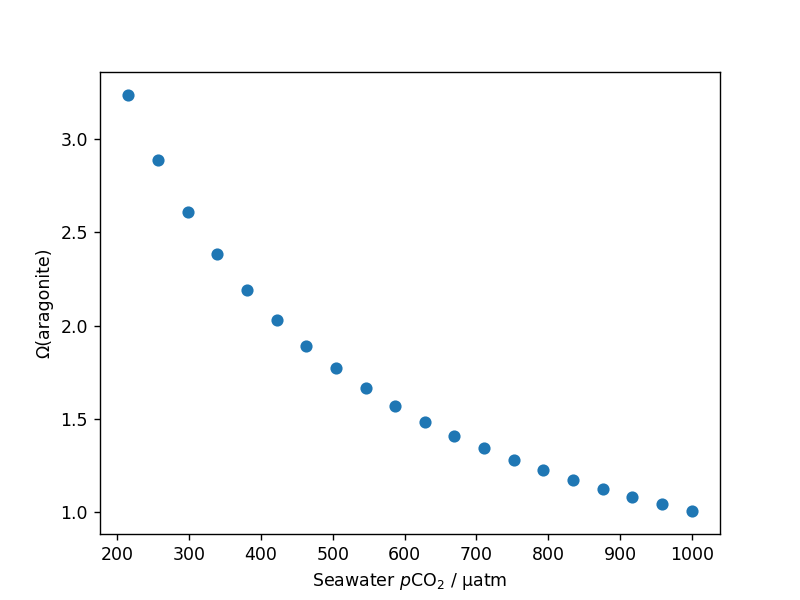

In [6]:
from matplotlib import pyplot as plt  # now we can use Matplotlib's plotting tools
# Make the figures interactive:
%matplotlib notebook

# Draw a very basic plot
fig, ax = plt.subplots()
ax.scatter(pCO2_increasing, OmegaAr_response)
ax.set_xlabel('Seawater $p$CO$_2$ / μatm')
ax.set_ylabel('Ω(aragonite)');